<a href="https://colab.research.google.com/github/UTakeuchi/PDsimulator/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Q学習エージェント

In [ ]:
def greedy_probs(Q, state, epsilon=0, action_size=2):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)
    base_prob = epsilon / action_size
    action_probs = {action: base_prob for action in range(action_size)}  #{0: ε/4, 1: ε/4, 2: ε/4, 3: ε/4}
    action_probs[max_action] += (1 - epsilon)
    return action_probs

In [ ]:
class Agent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 2
        self.income = 0 #所得
        #self.rep = 'g' #評判(good or bad)    

        random_actions = {0: 0.5, 1: 0.5}
        self.pi = defaultdict(lambda: random_actions)
        self.b = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
    
    def get_action(self, state):
        action_probs = self.b[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def inc_update(self, reward):
        self.income += reward #income update

    def update(self, state, action, reward, next_state):
        next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
        next_q_max = max(next_qs)
        
        target = reward + self.gamma * next_q_max
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

        self.pi[state] = greedy_probs(self.Q, state, epsilon=0)
        self.b[state] = greedy_probs(self.Q, state, self.epsilon)

# Prisoner's dillema game

In [ ]:
class PDGame:
    def __init__(self):
        self.action_space = [0, 1]
        self.action_meaning = {
            0: "Defect",
            1: "Cooperate",
        }
        self.b = 2 #benefit
        self.c = 1 #cost
        self.u1 = {(1, 1):self.b - self.c, (1, 0):-self.c, (0, 1):self.b, (0, 0):0}
        self.u2 = {(1, 1):self.b - self.c, (1, 0):self.b, (0, 1):-self.c, (0, 0):0}
    
    def matching():
        return None
        
    def reward(self, a1, a2):
        return self.u1[(a1,a2)], self.u2[(a1,a2)]
    

# シミュレーションの実行

state:(0, 0), policy:{0: 1.0, 1: 0.0}
state:(2, -1), policy:{0: 1.0, 1: 0.0}
state:(4, -2), policy:{0: 1.0, 1: 0.0}
state:(6, -3), policy:{0: 1.0, 1: 0.0}
state:(5, -1), policy:{0: 1.0, 1: 0.0}
state:(7, -2), policy:{0: 0.0, 1: 1.0}
state:(8, -1), policy:{0: 0.0, 1: 1.0}
state:(9, 0), policy:{0: 0.0, 1: 1.0}
state:(10, 1), policy:{0: 1.0, 1: 0.0}
state:(12, 0), policy:{0: 0.0, 1: 1.0}
state:(13, 1), policy:{0: 0.0, 1: 1.0}
state:(14, 2), policy:{0: 1.0, 1: 0.0}
state:(16, 1), policy:{0: 1.0, 1: 0.0}
state:(15, 3), policy:{0: 1.0, 1: 0.0}
state:(17, 2), policy:{0: 0.0, 1: 1.0}
state:(18, 3), policy:{0: 1.0, 1: 0.0}
state:(20, 2), policy:{0: 1.0, 1: 0.0}
state:(19, 4), policy:{0: 1.0, 1: 0.0}
state:(18, 6), policy:{0: 0.0, 1: 1.0}
state:(19, 7), policy:{0: 0.0, 1: 1.0}
state:(20, 8), policy:{0: 1.0, 1: 0.0}
state:(22, 7), policy:{0: 0.0, 1: 1.0}
state:(23, 8), policy:{0: 1.0, 1: 0.0}
state:(22, 10), policy:{0: 1.0, 1: 0.0}
state:(24, 9), policy:{0: 1.0, 1: 0.0}
state:(23, 11), policy:{0:

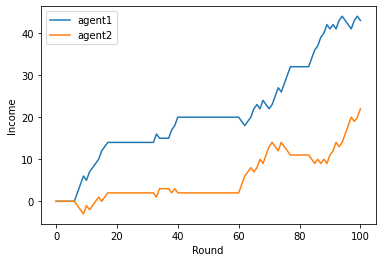

In [ ]:
env = PDGame()
agent1 = Agent()
agent2 = Agent()

income1_history = [0]
income2_history = [0]
rounds = 100
for round in range(rounds):
    state = (agent1.income, agent2.income)
    
    a1 = agent1.get_action(state)
    a2 = agent2.get_action(state)
    r1, r2 = env.reward(a1, a2)

    next_state = (agent1.inc_update(r1), agent2.inc_update(r2))
    agent1.update(state, a1, r1, next_state)
    agent2.update(state, a2, r2, next_state)
    income1_history.append(agent1.income)
    income2_history.append(agent2.income)

for key, value in agent1.pi.items():
    print('state:{}, policy:{}'.format(key, value))
print(len(agent1.pi))

def plot_total_income(history1, history2):
    plt.xlabel('Round')
    plt.ylabel('Income')
    plt.plot(range(len(history1)), history1, label='agent1')
    plt.plot(range(len(history2)), history2, label='agent2')
    #plt.ylim(0,200)
    plt.legend()
    plt.show()

plot_total_income(income1_history, income2_history)

# 以下保留

In [ ]:
class Renderer:
    def __init__(self, reward_map, goal_state, wall_state):
        self.reward_map = reward_map
        self.goal_state = goal_state
        self.wall_state = wall_state
        self.ys = len(self.reward_map)
        self.xs = len(self.reward_map[0])

        self.ax = None
        self.fig = None
        self.first_flg = True

    def set_figure(self, figsize=None):
        fig = plt.figure(figsize=figsize)
        self.ax = fig.add_subplot(111)
        ax = self.ax
        ax.clear()
        ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.set_xticks(range(self.xs))
        ax.set_yticks(range(self.ys))
        ax.set_xlim(0, self.xs)
        ax.set_ylim(0, self.ys)
        ax.grid(True)

    def render_v(self, v=None, policy=None, print_value=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax

        if v is not None:
            color_list = ['red', 'white', 'green']
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
                'colormap_name', color_list)

            # dict -> ndarray
            v_dict = v
            v = np.zeros(self.reward_map.shape)
            for state, value in v_dict.items():
                v[state] = value

            vmax, vmin = v.max(), v.min()
            vmax = max(vmax, abs(vmin))
            vmin = -1 * vmax
            vmax = 1 if vmax < 1 else vmax
            vmin = -1 if vmin > -1 else vmin

            ax.pcolormesh(np.flipud(v), cmap=cmap, vmin=vmin, vmax=vmax)

        for y in range(ys):
            for x in range(xs):
                state = (y, x)
                r = self.reward_map[y, x]
                if r != 0 and r is not None:
                    txt = 'R ' + str(r)
                    if state == self.goal_state:
                        txt = txt + ' (GOAL)'
                    ax.text(x+.1, ys-y-0.9, txt)

                if (v is not None) and state != self.wall_state:
                    if print_value:
                        offsets = [(0.4, -0.15), (-0.15, -0.3)]
                        key = 0
                        if v.shape[0] > 7: key = 1
                        offset = offsets[key]
                        ax.text(x+offset[0], ys-y+offset[1], "{:12.2f}".format(v[y, x]))

                if policy is not None and state != self.wall_state:
                    actions = policy[state]
                    max_actions = [kv[0] for kv in actions.items() if kv[1] == max(actions.values())]

                    arrows = ["↑", "↓", "←", "→"]
                    offsets = [(0, 0.1), (0, -0.1), (-0.1, 0), (0.1, 0)]
                    for action in max_actions:
                        arrow = arrows[action]
                        offset = offsets[action]
                        if state == self.goal_state:
                            continue
                        ax.text(x+0.45+offset[0], ys-y-0.5+offset[1], arrow)

                if state == self.wall_state:
                    ax.add_patch(plt.Rectangle((x,ys-y-1), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
        plt.show()

    def render_q(self, q, show_greedy_policy=True):
        self.set_figure()

        ys, xs = self.ys, self.xs
        ax = self.ax
        action_space = [0, 1, 2, 3]

        qmax, qmin = max(q.values()), min(q.values())
        qmax = max(qmax, abs(qmin))
        qmin = -1 * qmax
        qmax = 1 if qmax < 1 else qmax
        qmin = -1 if qmin > -1 else qmin


        color_list = ['red', 'white', 'green']
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            'colormap_name', color_list)

        for y in range(ys):
            for x in range(xs):
                for action in action_space:
                    state = (y, x)
                    r = self.reward_map[y, x]
                    if r != 0 and r is not None:
                        txt = 'R ' + str(r)
                        if state == self.goal_state:
                            txt = txt + ' (GOAL)'
                        ax.text(x+.05, ys-y-0.95, txt)

                    if state == self.goal_state:
                        continue

                    tx, ty = x, ys-y-1

                    action_map = {
                        0: ((0.5+tx, 0.5+ty), (tx+1, ty+1), (tx, ty+1)),
                        1: ((tx, ty), (tx+1, ty), (tx+0.5, ty+0.5)),
                        2: ((tx, ty), (tx+0.5, ty+0.5), (tx, ty+1)),
                        3: ((0.5+tx, 0.5+ty), (tx+1, ty), (tx+1, ty+1)),
                    }
                    offset_map = {
                        0: (0.1, 0.8),
                        1: (0.1, 0.1),
                        2: (-0.2, 0.4),
                        3: (0.4, 0.4),
                    }
                    if state in self.wall_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0.4, 0.4, 0.4, 1.)))
                    elif state in self.goal_state:
                        ax.add_patch(plt.Rectangle((tx, ty), 1, 1, fc=(0., 1., 0., 1.)))
                    else:

                        tq = q[(state, action)]
                        color_scale = 0.5 + (tq / qmax) / 2  # normalize: 0.0-1.0

                        poly = plt.Polygon(action_map[action],fc=cmap(color_scale))
                        ax.add_patch(poly)

                        offset= offset_map[action]
                        ax.text(tx+offset[0], ty+offset[1], "{:12.2f}".format(tq))
        plt.show()

        if show_greedy_policy:
            policy = {}
            for y in range(self.ys):
                for x in range(self.xs):
                    state = (y, x)
                    qs = [q[state, action] for action in range(4)]  # action_size
                    max_action = np.argmax(qs)
                    probs = {0:0.0, 1:0.0, 2:0.0, 3:0.0}
                    probs[max_action] = 1
                    policy[state] = probs
            self.render_v(None, policy)